Поколение 1: Макс приспособ. = 61, Средняя приспособ. = 49.695
Лучший хромосома: [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0]
Поколение 2: Макс приспособ. = 65, Средняя приспособ. = 53.61
Лучший хромосома: [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
Поколение 3: Макс приспособ. = 65, Средняя приспособ. = 57.0
Лучший хромосома: [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1

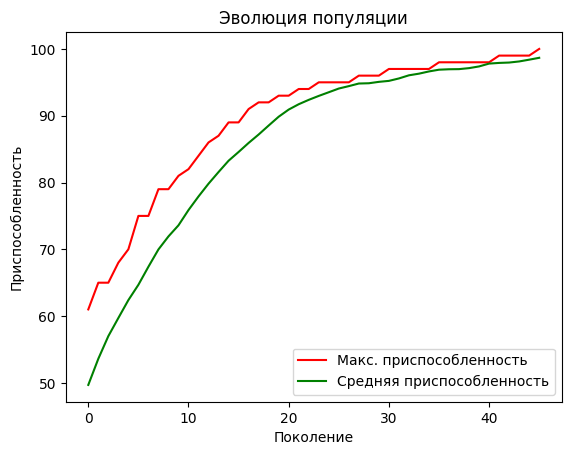

In [4]:
import random
import matplotlib.pyplot as plt

BIT_LENGTH = 100  # Длина хромосомы (битовой строки)
POP_SIZE = 200    # Размер популяции
CROSS_RATE = 0.9  # Вероятность скрещивания
MUTATE_RATE = 0.1 # Вероятность мутации
GEN_LIMIT = 50    # Максимальное количество поколений

random.seed(100)


class Genome:
    def __init__(self, genes=None):
        if genes is None:
            self.genes = [random.randint(0, 1) for _ in range(BIT_LENGTH)]
        else:
            self.genes = genes
        self.fitness = self.evaluate_fitness()

    def evaluate_fitness(self):
        return sum(self.genes)


def initialize_population():
    return [Genome() for _ in range(POP_SIZE)]


def tournament_selection(population):
    def select():
        candidates = random.sample(population, 3)
        return max(candidates, key=lambda genome: genome.fitness)

    return [select() for _ in range(POP_SIZE)]


def crossover(parent1, parent2):
    if random.random() < CROSS_RATE:
        point = random.randint(1, BIT_LENGTH - 1)
        child1_genes = parent1.genes[:point] + parent2.genes[point:]
        child2_genes = parent2.genes[:point] + parent1.genes[point:]
        return Genome(child1_genes), Genome(child2_genes)
    return Genome(parent1.genes[:]), Genome(parent2.genes[:])


def mutate(genome):
    for i in range(len(genome.genes)):
        if random.random() < (1.0 / BIT_LENGTH):
            genome.genes[i] = 1 - genome.genes[i]
    genome.fitness = genome.evaluate_fitness()


def evolve():
    population = initialize_population()
    max_fitness_history = []
    avg_fitness_history = []

    for generation in range(GEN_LIMIT):
        # Оценка приспособленности
        fitness_values = [genome.fitness for genome in population]
        max_fitness = max(fitness_values)
        avg_fitness = sum(fitness_values) / POP_SIZE

        max_fitness_history.append(max_fitness)
        avg_fitness_history.append(avg_fitness)

        print(f"Поколение {generation + 1}: Макс приспособ. = {max_fitness}, Средняя приспособ. = {avg_fitness}")
        best_genome = population[fitness_values.index(max_fitness)]
        print("Лучший хромосома:", best_genome.genes)

        # Прекращение, если достигнут идеал
        if max_fitness == BIT_LENGTH:
            break

        # Селекция и кроссовер
        new_population = []
        selected = tournament_selection(population)
        for i in range(0, POP_SIZE, 2):
            parent1, parent2 = selected[i], selected[i + 1]
            offspring1, offspring2 = crossover(parent1, parent2)
            new_population.append(offspring1)
            new_population.append(offspring2)

        # Мутация
        for genome in new_population:
            if random.random() < MUTATE_RATE:
                mutate(genome)

        population = new_population

    return max_fitness_history, avg_fitness_history


max_fit_vals, avg_fit_vals = evolve()

plt.plot(max_fit_vals, color='red', label='Макс. приспособленность')
plt.plot(avg_fit_vals, color='green', label='Средняя приспособленность')
plt.xlabel('Поколение')
plt.ylabel('Приспособленность')
plt.title('Эволюция популяции')
plt.legend()
plt.show()